<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_17_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
## Lecture 17
### Fourier Transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from scipy.fft import fft, ifft, fftfreq
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt


In [ ]:
# !pip install pandas-datareader
!pip install --upgrade pandas


In [ ]:
import pandas_datareader as pdr

In [ ]:
pip install --upgrade pandas-datareader

### QUESTIONS
Create a synthetic data set comprising a sum of sine functions.
- Do an FFT analysis for 1 sine function
- Do an FFT analysis for 1 sine function + constant
- Consider 5 sine functions (with frequencies 1,2,3,4,5)
- Vary the sampling rate and/or step size to test the Nyquist frequency. What is the role of aliasing in your analysis?

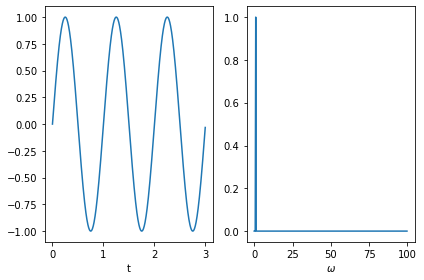

In [ ]:
# Do an FFT analysis for 1 sine function

y = np.sin(np.pi*2*x)
yk = fft(y)
xk = fftfreq(N, T)[:N//2]
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,2,2)
plt.plot(xk, 2.0/N * np.abs(yk[0:N//2]))
plt.xlabel('$\omega$')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


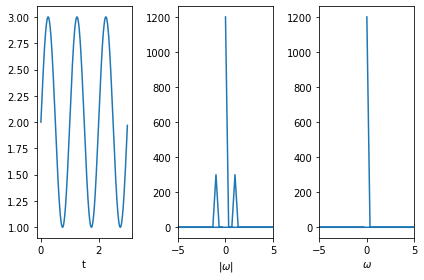

In [ ]:
# Do an FFT analysis for 1 sine function + constant

N = 600 #number points
T = 1.0/200.0 #spacing
x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(np.pi*2*x) + 2
yk = fft(y)
xk = fftfreq(N, T)
plt.subplot(1,3,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,3,2)
plt.plot(xk, np.abs(yk)) #need to include real and imaginary parts
plt.xlim(-5,5)
plt.xlabel('$|\omega$|')
plt.subplot(1,3,3)
plt.plot(xk, yk) #plot real parts only
plt.xlim(-5,5)
plt.xlabel('$\omega$')
plt.tight_layout()
plt.show()


In [ ]:
print("yk has real and imaginary components: \n")
print(yk[:10])

yk has real and imaginary components: 

[ 1.20000000e+03-0.00000000e+00j -9.41618279e-16+6.67832994e-15j
  5.38793502e-15+1.08086112e-14j -5.77337439e-14-3.00000000e+02j
  7.17060639e-15-7.26826960e-15j -3.15845381e-15-1.18022134e-14j
 -8.93911991e-15-2.85344342e-15j  9.73942191e-16-7.99304235e-15j
  6.56008207e-15-3.84167164e-15j  4.25922193e-17-3.18384328e-15j]


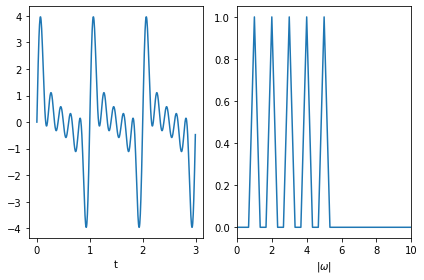

In [ ]:
# Consider 5 sine functions (with frequencies 1,2,3,4,5)
N = 600 #number points
T = 1.0/200.0 #spacing
x = np.linspace(0, N*T, N, endpoint=False)

def geny(n):
  sum = 0
  for ith in np.arange(n):
    ith = ith + 1
    sum = sum + np.sin(2*np.pi*ith*x)
  return sum

n = 5
y = geny(n)
yk = fft(y)
xk = fftfreq(N, T)
xk = fftfreq(N, T)[:N//2]
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('t')
plt.subplot(1,2,2)
plt.plot(xk, 2.0/N * np.abs(yk[0:N//2]))
plt.xlim(0,10)
plt.xlabel('$|\omega$|')

plt.tight_layout()
plt.show()

### Consider real world data
- We will use stock market data which can seem periodic at times

In [ ]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [ ]:
df = pdr.get_data_yahoo("TSLA") #, start, end) #Tesla
df = pdr.get_data_yahoo("SPY") #, start, end) #SP500 index
# df = web.DataReader("TSLA", 'yahoo', start, end) #Tesla #use pdr instead
# df = web.DataReader("SPY", 'yahoo', start, end) #SP500 index

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-17,234.570007,232.880005,233.110001,234.570007,68405400.0,214.952866
2017-04-18,234.490005,233.080002,233.720001,233.869995,83225800.0,214.311432
2017-04-19,234.949997,233.179993,234.520004,233.440002,68699900.0,213.917374
2017-04-20,235.850006,233.779999,234.149994,235.339996,92572200.0,215.658478
2017-04-21,235.309998,234.130005,235.250000,234.589996,110389800.0,214.971222


In [ ]:
# assume time steps of one day and no weekends
t =  np.arange(len(df))
price = df['Close']; price = np.asarray(price)

Text(0, 0.5, 'price')

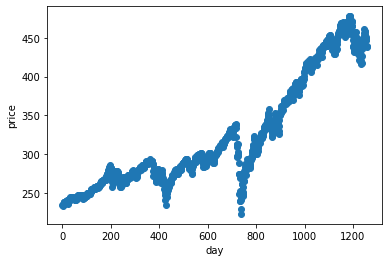

In [ ]:
#plot price data over a number of days
plt.scatter(t,price)
plt.xlabel('day')
plt.ylabel('price')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


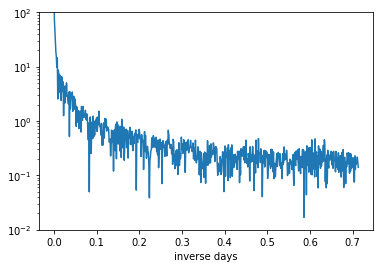

In [ ]:
# price = price - np.mean(price) #subtract baseline
price_fft = fft(price)
N = len(price)
T = price[0] - price[1]
xw = fftfreq(N, T)[:N//2]
plt.semilogy(xw, 2.0/N * np.abs(price_fft[0:N//2]))
plt.ylim(0,100)
plt.xlabel("inverse days")
plt.show()

In [ ]:
### QUESTION:
- vary the window and repeat the analysis
- smooth data and repeat the analysis
- repeat the above for the SP500
- How could you use your analysis to predict the stock price?